In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from interstellar import Tracks, DenseNetwork, set_seed

In [20]:
name = 'network_02a'
save_path = f'/home/ADF/ajl573/Data/interstellar_data/{name}'

if not os.path.exists(save_path):
    os.makedirs(save_path)

In [3]:
train = pd.read_csv('/home/ADF/ajl573/Data/interstellar_data/tracks_02/tracks_02_train.csv')
val = pd.read_csv('/home/ADF/ajl573/Data/interstellar_data/tracks_02/tracks_02_val.csv')

In [4]:
print(f'Length of training data = {len(train)}')
print(f'Length of validation data = {len(val)}')

Length of training data = 5163732
Length of validation data = 1290932


## Load pre-trained network

Optional

In [10]:
old_name = 'network_02'
old_save_path = f'/home/ADF/ajl573/Data/interstellar_data/{old_name}'

network = DenseNetwork.from_config(f'{old_save_path}/{old_name}_config.json')
network.load_model()
network.load_history()
network.name = name
network.path = path  # Note it's not great to change the path like this without checking it exists
network.model.summary()

Model: "network_02"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 5)]               0         
_________________________________________________________________
dense (Dense)                (None, 128)               768       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1

## Continue training

Continue to train the model if required.

In [14]:
print(f'Old number of batches = {len(train)//network.batch_size}')

Old number of batches = 868


In [27]:
n_batches = np.arange(10, 1000)  # Select a range where number of batches is reasonable
r = len(train) % n_batches 

# Print whole multiples of training size
print(f'choose number of batches from:\n{n_batches[r==0]}')

choose number of batches from:
[ 12  14  18  21  28  31  36  42  62  63  84  93 124 126 186 217 252 279
 372 434 558 651 661 868]


In [28]:
network.batch_size = len(train)//661

In [34]:
network.train(train, network.x_cols, network.y_cols, epochs=5200, validation_split=None, validation_data=val,
              callbacks=['checkpoint', 'tensorboard'])

Plot the loss.

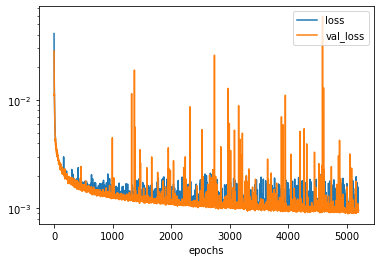

In [35]:
ax = network.history.plot(x='epochs', y=['loss', 'val_loss'])
ax.set_yscale('log')
ax.legend(loc='upper right');

Here we see there is still more training possible, but there is a lot more noise, maybe increase the batch size and drop the learning rate to cope with the change.

In [36]:
network.save()

## Best model

Load checkpointed best model, note that it replaces the current model in the network so take care when saving.

In [40]:
network.load_model(suffix='best_model')

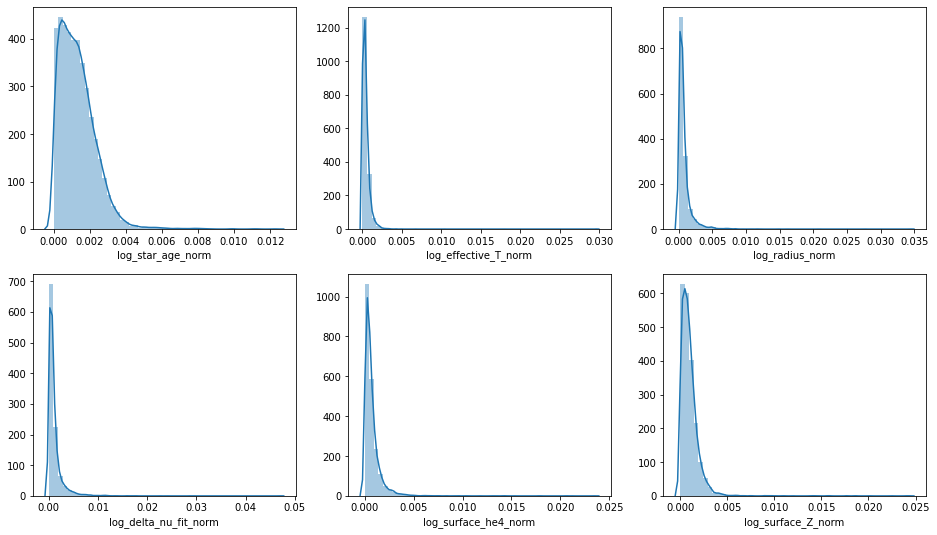

In [41]:
network.plot_metric(val.sample(10000));

In [42]:
network.scores(val.sample(10000))

,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,log_surface_he4_norm,log_surface_Z_norm
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,1.318791e-03,4.585954e-04,7.946131e-04,1.131634e-03,7.181503e-04,9.825670e-04
std,9.874618e-04,5.065911e-04,1.045998e-03,1.573195e-03,9.781003e-04,1.064029e-03
min,5.710960e-08,1.547652e-08,6.157036e-08,2.630379e-08,2.168789e-08,2.691499e-07
25%,5.818239e-04,1.694936e-04,2.700356e-04,3.488621e-04,2.266241e-04,3.852294e-04
50%,1.155584e-03,3.494507e-04,5.160491e-04,6.802411e-04,4.796586e-04,7.870566e-04
75%,1.846057e-03,5.983951e-04,9.214105e-04,1.287241e-03,8.894351e-04,1.290126e-03
max,1.051062e-02,2.594295e-02,2.972806e-02,3.542879e-02,2.565213e-02,2.529283e-02
